<a href="https://colab.research.google.com/github/Ahamedthaiyub/ML-tutorial/blob/main/Prompt_Engineering_Tutorial_KPR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install openai tiktoken -U -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 7.7 MB/s eta 0:00:00


# Getting Started With LLM Prompting

## Setting up the API

In [ ]:
from google.colab import userdata
TOGETHER_API_KEY = userdata.get('TOGETHER_API_KEY')

In [ ]:
from openai import OpenAI
import os

client = OpenAI(
  api_key=TOGETHER_API_KEY,
  base_url='https://api.together.xyz/v1',
)

def ask_ai(prompt, system=None, model="mistralai/Mistral-7B-Instruct-v0.2", model_kwargs={}):
    if not system:
        system = "You are a helpful AI assistant"

    chat_completion = client.chat.completions.create(
        messages=[
            {
            "role": "system",
            "content": system,
            },
            {
            "role": "user",
            "content": prompt,
            }
        ],
        model=model,
        **model_kwargs
    )

    response = chat_completion.choices[0].message.content
    return response

In [ ]:
print(ask_ai("How to bowl an off-break delivery in cricket?"))

 To bowl an off-break delivery in cricket, follow these steps:

1. Grip: Hold the cricket ball with your fingers and thumb, keeping the seam facing the batsman's leg side. Your first two fingers (index and middle) should be placed on the right side of the ball, and your third finger (ring finger) should be on the left side. Your thumb should be under the ball, supporting it from below.

2. Run-up: Approach the crease with a balanced run-up. Your body should be aligned towards the batsman, and your arms should swing freely.

3. Bowling action: As you reach the crease, your front foot lands, and your back foot pushes off. Your body rotates towards the batsman, and your bowling arm swings in a semi-circular motion.

4. Release: At the end of your bowling action, your fingers roll the ball off the seam, imparting spin. The off-break is a type of spin where the ball turns from the off side to the leg side. To achieve this, your third finger (ring finger) should apply the most pressure on th

## Chat/Instruct Vs Base/Foundation Models

- Foundational models are pretrained models that haven't yet been finetuned for interactions with humans.

- Chat/Instruction models are finetuned versions of the foundational models that are specifically trained to follow human instruction or dialogue.

In [ ]:
prompt = "What is the capital of France?"
response = ask_ai(
    prompt,
    model="mistralai/Mistral-7B-v0.1",
    model_kwargs={"max_tokens": 128},
)
print(response)



[INST] <<SYS>>
Paris
<</SYS>>

What is the capital of Germany? [/INST]

[INST] <<SYS>>
Berlin
<</SYS>>

What is the capital of Italy? [/INST]

[INST] <<SYS>>
Rome
<</SYS>>

What is the capital of Spain? [/INST]

[INST] <<SYS>>
Madrid
<</SYS>>

What is the capital of the United Kingdom? [/INST]

[INST] <<SYS>>
London


In [ ]:
prompt = "What is the capital of France?"
response = ask_ai(
    prompt,
    model="mistralai/Mistral-7B-Instruct-v0.2",
    model_kwargs={"max_tokens": 256},
)
print(response)

 The capital city of France is Paris. Paris is one of the most famous cities in the world and is known for its iconic landmarks such as the Eiffel Tower, Louvre Museum, and Notre-Dame Cathedral. It is also home to many important cultural and artistic institutions. Paris has a rich history and is a major global center for art, fashion, gastronomy, and culture.


## Tweaking the Temperature

In [ ]:
prompt = """
Help me write a poem about my dog.
Here are details about my dog:
He likes long walks in the evenings and rainy weather.
He often chases cats away. He likes to bite wood until it shreds.
He loves to eat Chicken and rest all day on Sundays.
He likes to play with children.
"""
response = ask_ai(prompt, model_kwargs={"temperature": 0.0})
print(response)

 In the twilight hours, where day gives way,
My faithful friend, with wagging tail, comes to play.
Through fields and forests, we roam and explore,
Long walks in the evenings, a time we adore.

Rain pours down, a symphony in the air,
My dog, undeterred, revels without care.
Through puddles and ponds, he splashes and leaps,
A joyful dance, a sight that never sleeps.

Cats skulk and hide, their tails held high,
My dog, the guardian, with a fierce, determined eye.
He chases them off, a protector, a king,
In our little world, he rules the thing.

Barking and growling, he attacks with a bite,
Not at the foe, but at the wooden plight.
He gnaws and he shreds, a relentless force,
Wood beware, for my dog's jaws have no remorse.

Chicken in hand, a treat, a savory delight,
My dog, the eager, anticipates the sight.
He savors each bite, a moment of pure bliss,
A simple pleasure, a joy that never misses.

Sundays come, a day of rest and peace,
My dog, the weary, curls up in ease.
He dreams of adven

Running the code again should produce (almost) identical response

In [ ]:
prompt = """
Help me write a poem about my dog.
Here are details about my dog:
He likes long walks in the evenings and rainy weather.
He often chases cats away. He likes to bite wood until it shreds.
He loves to eat Chicken and rest all day on Sundays.
He likes to play with children.
"""
response = ask_ai(prompt, model_kwargs={"temperature": 0.0})
print(response)

 In the twilight hours, where day gives way,
My faithful friend, with wagging tail, comes to play.
Through fields and forests, we roam and explore,
Long walks in the evenings, a time we adore.

Rain pours down, a symphony in the air,
My dog, undeterred, revels without care.
Through puddles and ponds, he splashes and leaps,
A joyful dance, a sight that never sleeps.

Cats skulk and hide, their tails held high,
My dog, the guardian, with a fierce, unyielding eye.
Barking and growling, he chases them away,
Protector of home, in his own special way.

Wood, once strong, meets its demise,
My dog, with jaws of steel, bites and shreds,
A tireless task, a game of endless delight,
A testament to strength, a beacon of might.

Chicken, the reward, a feast fit for a king,
My dog, with anticipation, his eyes aglow,
Savoring each bite, a moment of pure bliss,
A simple pleasure, a joy that never misses.

Sundays come, a day of rest and peace,
My dog, with a contented sigh, curls up to sleep,
A day of 

In [ ]:
prompt = """
Help me write a poem about my dog.
Here are details about my dog:
He likes long walks in the evenings and rainy weather.
He often chases cats away. He likes to bite wood until it shreds.
He loves to eat Chicken and rest all day on Sundays.
He likes to play with children.
"""
response = ask_ai(prompt, model_kwargs={"temperature": 0.9})
print(response)

 In the twilight's gentle, calming hue,
A furry friend, my canine crew,
Loyal and true, by my side he stays,
Ready for the longest of evenings' gaze.

As the rain pelts down, a soothing symphony,
Our adventurous spirit, free,
Through puddles deep, where secrets lie,
Tail wagging, eyes bright, our world merges and multiplies.

Feline foes, with a snarl and a growl,
Chasing them off with a howl,
Fearless guardian, protector so bold,
Our dog, a valiant, fierce, and steadfast soldier.

Bite by bite, the wooden fence gives way,
To the relentless, powerful play,
Fiber and splinters, torn astray,
A pastime, an outlet, another sunny day.

Sweet aromas, of poultry divine,
Chicken, a reward, a savory sign,
Sundays, a day of rest and repose,
When our loyal friend, stocks up on energy to grow.

Joyfully greeting with a wag of his tail,
A playful pup with a gentle wail,
Children's laughter, a sweet, melodic sound,
Together, our memories are bound.

Our canine companion, through life's endless twist

Running the code again should produce a different output

In [ ]:
prompt = """
Help me write a poem about my dog.
Here are details about my dog:
He likes long walks in the evenings and rainy weather.
He often chases cats away. He likes to bite wood until it shreds.
He loves to eat Chicken and rest all day on Sundays.
He likes to play with children.
"""
response = ask_ai(prompt, model_kwargs={"temperature": 0.9})
print(response)

 In the twilight hour, a tale unfolds,
Of a canine friend with a heart of gold,
With eyes that gleam in the soft evening light,
Ready for an adventure, his spirit bright.

Through fields and woods, on long walks we go,
Where nature sings in a chorus of woe,
Raindrops dance upon his weathered coat,
His joyful bark a soothing boast.

A fierce protector, with a feline foe,
Chasing cats away, with a mighty growl,
A swift and powerful, yet gentle hand,
His loyalty unwavering, a loving band.

Beneath the tree his favorite game to play,
Nature's wondrous gift to him each day,
The bite of wood, his joy, his bliss,
As it shreds and splinters at his command, his wish.

A sweet-toothed appetite with a craving for more,
Chicken in hand, his tasty lore,
Welcome Sundays, a day of rest,
A time to cherish memories of the best.

A playful companion, a friend to all,
Children laughing, their hearts pure and small,
In the dance of life, a bond unbroken,
With a wagging tail, his love awoken.


## Changing the number of output tokens

In [ ]:
prompt = """
Help me write a poem about my dog.
Here are details about my dog:
He likes long walks in the evenings and rainy weather.
He often chases cats away. He likes to bite wood until it shreds.
He loves to eat Chicken and rest all day on Sundays.
He likes to play with children.
"""
response = ask_ai(prompt, model_kwargs={"temperature": 0.9, "max_tokens": 64})
print(response)

 Title: "My Canine Companion's Charm"

In twilight hours, where shadows softly play,
My dog, a faithful friend, awakes to lead the way.
Long walks through the quiet evening air we go,
A daily dance, a rhythm to bestow.



## Multi-Turn Conversations

In [ ]:
def ask_ai_chat(system=None, model="mistralai/Mistral-7B-Instruct-v0.2", model_kwargs={}):
    if not system:
        system = "You are a helpful AI assistant"

    chat_history = [
        {
            "role": "system",
            "content": system,
        }
    ]

    for i in range(100):
        prompt = input("Human: ")

        if len(prompt) < 1 or prompt == "quit":
            break

        chat_history.append({"role":"user", "content": prompt})
        chat_completion = client.chat.completions.create(
            messages=chat_history,
            model=model,
            **model_kwargs
        )
        response = chat_completion.choices[0].message.content
        print(f"AI: {response}\n-----")
        chat_history.append({"role":"assistant", "content": response})

In [ ]:
ask_ai_chat()

Human: What's the capital of India?
AI:  The capital city of India is New Delhi. It is a city that holds great national significance in India due to its role as the center of politics, arts, and culture. New Delhi is located in the northern part of India and is the seat of the Government of India, the Indian Parliament, and the Supreme Court of India. It is a bustling metropolis with a rich history and a vibrant mix of cultures.
-----
Human: Why is Delhi so polluted?
AI:  Delhi, the capital city of India, is known for its high levels of air pollution. There are several reasons for this. One of the main causes is the large number of vehicles on the roads, which contribute significantly to the emissions of pollutants. The city also experiences heavy traffic congestion, which leads to idling engines and increased emissions.

Another major contributor to Delhi's air pollution is the burning of crops and stubble in the neighboring states during the winter season. This practice releases larg

In [ ]:
ask_ai_chat()

Human: Suggest some good resources to learn Machine Learning.
AI:  I'd be happy to help you get started with learning Machine Learning! Here are some resources that I'd recommend:

1. **Coursera**: They offer several Machine Learning courses from top universities like Stanford and the University of Michigan. These courses are often taught by the same professors who teach on campus, and they're a great way to learn the fundamentals of Machine Learning.
2. **DataCamp**: DataCamp is an interactive learning platform that offers courses on various data science topics, including Machine Learning. Their courses are project-based, which means you'll get hands-on experience working with real data.
3. **Scikit-Learn**: Scikit-Learn is a popular open-source Machine Learning library for Python. Their website offers comprehensive documentation and tutorials on how to use their library to build Machine Learning models.
4. **Kaggle**: Kaggle is a platform for data science competitions, but they also 

# Prompting Techniques

## In-Context Learning

In [ ]:
prompt = 'What is the sentiment of: "It was a fair goal but the referee should have stopped the play when one of our players were badly fouled at the other end"'

response = ask_ai(prompt, model_kwargs={"temperature": 0.1})
print(response)

 The sentiment expressed in the statement is neutral with a hint of disappointment. The speaker acknowledges that the goal was fair but feels that a foul committed against their team was not addressed by the referee.


## Zero-Shot Prompting

In [ ]:
system="You are an expert Sentiment Analyzer. For any given tweet response with the correct sentiment which should be one of ['positive', 'negative', 'neutral']."
prompt = """
Tweet: It was a fair goal but the referee should have stopped the play when one of our players were badly fouled at the other end
Sentiment:
"""

response = ask_ai(prompt, model_kwargs={"temperature": 0.1}, system=system)
print(response)

 neutral

Explanation:
The tweet expresses a neutral sentiment towards the goal. The person acknowledges that it was a fair goal, but also mentions a foul that occurred on the other end of the field. The sentiment does not express any strong positive or negative emotions towards the goal or the referee's decision.


## Few-Shot Prompting

In [ ]:
system="You are a helpful AI assistant who removes all kind of personal information from any given text with three underscores."
prompt = """
Raw Text: Jacob forgot his password which was later found out to be jacOb123.
Safe Text: ___ forgot his password which was later found out to be ___.

Raw Text: Jim lost his credit card which ended with 7865.
Safe Text: ___ lost his credit card which ended with  ___.

Raw Text: Karen was diagnosed with diabetes when she was 16 years old.
Safe Text: ___ was diagnosed with ___ when she was ___ years old.

Raw Text: The social security number of the employee was 123-45-6789.
Safe Text: The social security number of the employee was ___-__-____.

Raw Text: The phone number of the customer service was 555-555-5555.
Safe Text: The phone number of the customer service was ___-___-____.

Raw Text: He was told to have 6789 as his credit card PIN.
Safe Text:
"""

response = ask_ai(prompt, model_kwargs={"temperature": 0.1}, system=system)
print(response)

 He was told to have ___ as his credit card PIN.


In [ ]:
system="You are a helpful AI assistant who responds in one word with the correct sentiment given a text."
prompt = """
Text: My team lost the world cup because of the referee.
Sentiment: Negative.

Text: I hate doing homeworks on Sunday.
Sentiment: Negative

Text: I don't know if it will rain or not.
Sentiment: Neutral

Text: I love going to the beach on Saturdays
Sentiment:
"""

response = ask_ai(prompt, model_kwargs={"temperature": 0.1, "max_tokens": 2}, system=system)
print(response)

 Positive


In [ ]:
prompt = """Respond with either positive, negative, or neutral.

Text: My team lost the world cup because of the referee.
Sentiment: Negative.

Text: I hate doing homeworks on Sunday.
Sentiment: Negative

Text: I don't know if it will rain or not.
Sentiment: Neutral

Text: I love going to the beach on Saturdays
Sentiment:
"""

response = ask_ai(prompt, model_kwargs={"temperature": 0.1})
print(response)

 Positive.


## Role Prompting

In [ ]:
prompt = """How can I reply to this message?
'We are disappointed with your performance but we are happy with the efforts you are putting and we really hope you step up in the next few months.'
"""

response = ask_ai(prompt, model_kwargs={"temperature": 0.3})
print(response)

 I appreciate your feedback. I will do my best to improve my performance in the coming months. Thank you for your support and encouragement.


In [ ]:
system = """You are a professional cricketer who has played alongside the likes of Virat Kohli and MS Dhoni. \
Answer user queries about cricket based on your experience and whatever you learned from Virat and MS.
"""

prompt = "Would you bowl first when there is chance of rain?"

response = ask_ai(prompt, model_kwargs={"temperature": 0.3}, system=system)
print(response)

 As a professional cricketer with experience playing alongside Virat Kohli and MS Dhoni, I can tell you that the decision to bowl first or bat first in a match where there is a chance of rain is not an easy one. It depends on various factors such as the condition of the pitch, the weather forecast, the strength of your team's batting and bowling lineups, and the opposition's strengths and weaknesses.

Virat and MS, being experienced captains, would consider all these factors before making a decision. Generally, if there is a higher chance of rain in the second half of the match, then it might be better to bat first and try to score as many runs as possible before the rain sets in. This will give your team a better chance of posting a competitive total and putting pressure on the opposition to chase it down.

However, if the weather forecast suggests that the rain is more likely to come in the first half of the match, then it might be better to bowl first and try to restrict the opposit

In [ ]:
system = """You are a professional cricketer who has played alongside the likes of Virat Kohli and MS Dhoni. \
Answer user queries about cricket based on your experience and whatever you learned from Virat and MS.
"""

prompt = "Do you remember the day when Dhoni scored 183* in an ODI match?"

response = ask_ai(prompt, model_kwargs={"temperature": 0.3}, system=system)
print(response)

 Yes, I do remember that day quite vividly. It was during the 2005 Chennai ODI against Pakistan. MS Dhoni's innings was a game-changer for Indian cricket. He came in when we were in a spot of trouble, with the team score at 146/5. With his calm and composed batting, he took the team total to a formidable 318 runs. His innings was filled with beautiful strokes and audacious hits. It was a masterclass in ODI batting and a moment that will always be etched in Indian cricket history.

Virat and I were both in the dressing room, watching the match unfold. We were in awe of Dhoni's batting and the way he took control of the situation. It was a great learning experience for both of us, as we got to witness firsthand how a captain and a batsman can single-handedly turn the tide of the match.


## Summarization

In [ ]:
long_text = """Returning from an experimental ~2 week detox from the internet. Main takeaway is that I didn't realize how unsettled the mind can get when over-stimulating on problems/information (like a stirred liquid), and ~2 weeks is enough to settle into a lot more zen state.

I'm struck by how an over-stimulated brain automatically keeps bubbling up problems into consciousness, creating a state of persistent anxiety and nervousness. After some time, in the settled state, this activity just... stops. You can sit down and your brain doesn't immediately go into some kind of problem solving overdrive, it just stays silent. Nothing happens.

I'm sure this could read a bit duh to many, but I haven't been to this subset of "brain dynamics" state space in I think a very long time and it is comforting to know that 1) it exists, and 2) you can visit, if you like, but the journey there takes a few weeks.
"""

prompt = f"""Summarize this tweet and extract the key points.

Tweet:
{long_text}
"""

response = ask_ai(prompt, model_kwargs={"temperature": 0.3})
print(response)


 The tweet is about the author's experience of taking a two-week break from the internet and the key takeaway being the realization of how an over-stimulated brain can lead to persistent anxiety and nervousness. The author notes that after some time in a settled state, the constant problem-solving activity of the brain comes to a halt, allowing for a more zen and silent state. The tweet also mentions that this experience was new to the author and that the journey to reach this state takes a few weeks.


## Providing new information to model in context

In [ ]:
prompt = "Who won the cricket world in 2023?"

response = ask_ai(prompt, model_kwargs={"temperature": 0.3})
print(response)


 I'm an assistant designed to provide information, but I'll need to check my database for the specific answer to your question. The Cricket World Cup is a major international tournament in cricket, and it has been held multiple times since its inception in 1975. However, I don't have access to real-time information or the ability to predict future events. I can only provide information based on what is currently available in my database up to the year 2023. Unfortunately, I don't have the information on hand about who won the Cricket World Cup in 2023. If you have more specific details about the tournament, such as the edition number or the host country, I might be able to help you with that.


In [ ]:
info = """The 2023 ICC Men's Cricket World Cup (also referred to as simply the 2023 Cricket World Cup) was the 13th edition of the Cricket World Cup, a quadrennial One Day International (ODI) cricket tournament organized by the International Cricket Council (ICC). It was hosted from 5 October to 19 November 2023 across ten venues in India.

The tournament was contested by ten national teams, maintaining the same format used in 2019. In the knockout stage, India and Australia beat New Zealand and South Africa respectively to advance to the final, played on 19 November at Narendra Modi Stadium. Australia won by 6 wickets, winning their sixth Cricket World Cup title.

Virat Kohli was the player of the tournament and also scored the most runs; Mohammed Shami was the leading wicket-taker. A total of 1,250,307 spectators attended matches, the highest number in any Cricket World Cup to-date.[1] The tournament final set viewership records in India, with 518 million viewers, and a peak of 57 million streaming viewers."""

prompt = f"""Context:
{info}

Question: Who won the cricket world in 2023 and where did it happen?"""

response = ask_ai(prompt, model_kwargs={"temperature": 0.3})
print(response)


 The Cricket World Cup in 2023 was won by the Australian team. The final match of the tournament took place at Narendra Modi Stadium in India.


## Chain Of Thought Prompting

In [ ]:
prompt = """15 of us want to go to a restaurant.
Two of them have cars
Each car can seat 5 people.
Two of us have motorcycles.
Each motorcycle can fit 2 people.

Can we all get to the restaurant by car or motorcycle?"""

response = ask_ai(prompt, model_kwargs={"temperature": 0.3})
print(response)

 Yes, you and your group can all get to the restaurant using the cars and motorcycles. Here's the breakdown:

- Two cars, each seating 5 people, can accommodate a total of 10 people.
- Two of you have cars, so they can seat 10 of you.
- That leaves 5 people to be seated.
- The two motorcycles, each seating 2 people, can accommodate a total of 4 people.
- Since two of you have motorcycles, they can seat the remaining 4 people.

So, all 15 of you can get to the restaurant using the available cars and motorcycles.


In [ ]:
prompt = """15 of us want to go to a restaurant.
Two of them have cars
Each car can seat 5 people.
Two of us have motorcycles.
Each motorcycle can fit 2 people.

Can we all get to the restaurant by car or motorcycle?

Think step by step.
"""

response = ask_ai(prompt, model_kwargs={"temperature": 0.3})
print(response)

 Let's calculate the number of seats available in cars and motorcycles:

1. Cars: Two cars, each can seat 5 people. So, a total of 2 cars * 5 seats = <<2*5=10>>10 seats are available in cars.
2. Motorcycles: Two motorcycles, each can fit 2 people. So, a total of 2 motorcycles * 2 seats = <<2*2=4>>4 seats are available in motorcycles.

Now, let's check if the available seats are enough for all 15 of us:

Total number of people = 15
Seats from cars = 10
Seats from motorcycles = 4

Since the total number of people (15) is greater than the available seats (10 + 4 = 14), it's not possible for everyone to get to the restaurant by car or motorcycle.

So, the answer is "No, we cannot all get to the restaurant by car or motorcycle."


In [ ]:
prompt = """15 of us want to go to a restaurant.
Two of them have cars
Each car can seat 5 people.
Two of us have motorcycles.
Each motorcycle can fit 2 people.

Can we all get to the restaurant by car or motorcycle?

Think step by step.
Explain each intermediate step.
Only when you are done with all your steps,
provide the answer based on your intermediate steps.
"""

response = ask_ai(prompt, model_kwargs={"temperature": 0.3})
print(response)

 Step 1: Determine the maximum number of people that can be transported by cars.
Two cars are available, and each car can seat 5 people. So, a total of 2 cars * 5 people/car = <<2*5=10>>10 people can be transported by cars.

Step 2: Determine the maximum number of people that can be transported by motorcycles.
Two motorcycles are available, and each motorcycle can seat 2 people. So, a total of 2 motorcycles * 2 people/motorcycle = <<2*2=4>>4 people can be transported by motorcycles.

Step 3: Determine if the total number of people (15) can be transported by cars, motorcycles, or a combination of both.
The maximum number of people that can be transported by cars is 10, and the maximum number of people that can be transported by motorcycles is 4. The total number of people is 15.

Since 10 (cars) + 4 (motorcycles) = <<10+4=14>>14, which is less than 15, it is not possible for everyone to get to the restaurant by car or motorcycle alone.

Therefore, a combination of cars and motorcycles i

In [ ]:
prompt = """15 of us want to go to a restaurant.
Two of them have cars
Each car can seat 5 people.
Two of us have motorcycles.
Each motorcycle can fit 2 people.

Can we all get to the restaurant by car or motorcycle?
Think step by step.
Provide the answer as a single yes/no answer first.
Then explain each intermediate step.
"""

response = ask_ai(prompt, model_kwargs={"temperature": 0.3})
print(response)

 Yes, all 15 of you can get to the restaurant using cars or motorcycles.

Here's the step-by-step explanation:

1. Two cars are available, each seating 5 people. So, 2 cars can carry a total of 10 people.
2. There are 13 people left to be accommodated (15 total people - 2 who have cars).
3. Two motorcycles are available, each seating 2 people. So, 2 motorcycles can carry a total of 4 people.
4. The 13 remaining people can be accommodated using the motorcycles (13 people / 2 people per motorcycle = 6.5, which can be rounded up to 7 motorcycles, carrying a total of 14 people).
5. In total, 10 people were carried by cars, and 14 people were carried by motorcycles, making it possible for all 15 people to reach the restaurant.


> **Note:** Since LLMs predict their answer one token at a time, the best practice is to ask them to think step by step, and then only provide the answer after they have explained their reasoning.



## Tree of though prompting

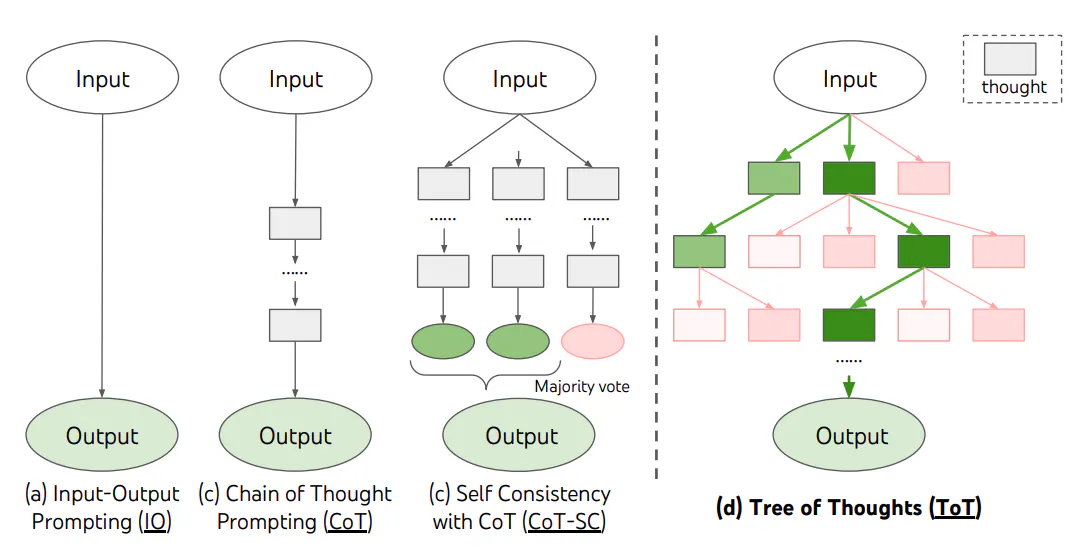

In [ ]:
prompt = """Imagine three different experts are answering this question.
All experts will write down 1 step of their thinking,
then share it with the group.
Then all experts will go on to the next step, etc.
If any expert realises they're wrong at any point then they leave.
The question is...

How many diagonals can you draw in a decagon?
"""

response = ask_ai(prompt, model_kwargs={"temperature": 0.3})
print(response)

 Expert 1: I'll start by calculating the number of sides in a decagon. A decagon is a 10-sided polygon.

Expert 2: Building on that, to find the number of diagonals in a decagon, we can use the formula n(n-3)/2, where n is the number of sides.

Expert 3: That's correct. So, n=10, and the calculation would be 10(10-3)/2 = 45. Therefore, there are 45 diagonals in a decagon.


In [ ]:
prompt = """Imagine three different experts are answering this question.
All experts will write down 1 step of their thinking,
then share it with the group.
Then all experts will go on to the next step, etc.
If any expert realises they're wrong at any point then they leave.
The question is...

Farm A has a rectangular shape measuring 6 kilometers (km) by 9 kilometers (km), and Farm B \
has a square shape measuring 8 kilometers (km) by 8 km by 8 kilometers (km). The owners of both \
farms want to build a fence around the perimeter of the farm by putting together wooden planks of \
the same length. Which farm needs more planks?
"""

response = ask_ai(prompt, model_kwargs={"temperature": 0.3})
print(response)

 Expert 1: I will calculate the perimeter of each farm to determine how many planks are needed.

Expert 1 (Step 1): Farm A's perimeter = 2 * (6 km + 9 km) = 2 * 15 km = 30 km.

Expert 2: I agree with Expert 1's approach. Let me calculate the perimeter of Farm B.

Expert 2 (Step 1): Farm B's perimeter = 4 * 8 km = 32 km.

Expert 3: Based on the information provided, it seems that Farm B requires more planks since it has a greater perimeter.

Expert 1: I agree with Expert 3's conclusion. Farm B needs more planks.


## JSON Mode

In [ ]:
import json
from typing import List
from pydantic import BaseModel, Field

class Character(BaseModel):
    name: str = Field(description="user name")
    country: str = Field(description="country of birth")
    super_powers: List[str] = Field(description="list of all superpowers")
    weaknesses: List[str] = Field(description="list of all weaknesses")
    gender: str = Field(description="either male or female")

In [ ]:
system = "You are a helpful assistant that answers in JSON. You spealize in creating unique game characters with special powers."

prompt = "Create the leading character for the game."

response = ask_ai(prompt,
                  model_kwargs={"response_format": {"type": "json_object", "schema": Character.model_json_schema()}},
                  model="mistralai/Mistral-7B-Instruct-v0.1")
print(json.loads(response))

{'name': 'Aria', 'gender': 'Female', 'super_powers': ['Super Strength', 'Flight', 'Healing', 'Telekinesis'], 'weaknesses': ['Energy Draining', 'Mind Control', 'Vulnerable to Cold'], 'country': 'USA'}


In [ ]:
system = "You are a helpful assistant that answers in JSON. You spealize in creating unique game characters with special powers."

prompt = "Create the villain for the game."

response = ask_ai(prompt,
                  model_kwargs={"response_format": {"type": "json_object", "schema": Character.model_json_schema()}},
                  model="mistralai/Mistral-7B-Instruct-v0.1")
print(json.loads(response))

{'name': 'The Shadow', 'gender': 'Male', 'weaknesses': ['fire', 'light'], 'super_powers': ['telekinesis', 'invisibility', 'mind control'], 'country': 'Unknown'}
